In [93]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

from prio_first import schedule_rules
from find_next_slot import schedule_rules_with_slots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_link_schedule(rules, bandwidth, reservations, results):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    max_time = 0
    if reservations:
        max_time = max(max_time, max(end for _, end, _ in reservations))
    if results:
        max_time = max(max_time, max(end for _, _, end, _ in results))
    max_time = max(max_time, 20)  # Minimum time range
    
    link_rect = patches.Rectangle((0, 0), max_time, bandwidth, 
                                linewidth=2, edgecolor='black', 
                                facecolor='lightgray', alpha=0.3)
    ax.add_patch(link_rect)
    
    for start_time, end_time, reserved_bw in reservations:
        reservation_rect = patches.Rectangle((start_time, 0), end_time - start_time, reserved_bw,
                                           linewidth=1, edgecolor='darkred', 
                                           facecolor='red', alpha=0.7)
        ax.add_patch(reservation_rect)
        
        # Add reservation label
        ax.text(start_time + (end_time - start_time)/2, reserved_bw/2, 
               f'Reserved\n{reserved_bw} bw', 
               ha='center', va='center', fontsize=8, color='white', weight='bold')
    
    y_offset = 0
    
    for i, (rule_idx, start_time, end_time, allocated_bw) in enumerate(results):
        size, priority = rules[rule_idx]
        color = 'blue'
        
        # Find the y position (stack rules vertically)
        y_pos = sum(res_bw for s, e, res_bw in reservations if s <= start_time < e)
        y_pos += y_offset
        
        rule_rect = patches.Rectangle((start_time, y_pos), end_time - start_time, allocated_bw,
                                        linewidth=1, edgecolor='darkblue', 
                                        facecolor=color, alpha=0.7)
        ax.add_patch(rule_rect)
        
        # Add rule label
        label = f'R{rule_idx}\nSize: {size}\nPrio: {priority}\nBW: {allocated_bw:.1f}'
        ax.text(start_time + (end_time - start_time)/2, y_pos + allocated_bw/2, 
               label, ha='center', va='center', fontsize=8, color='white', weight='bold')
        
        y_offset += allocated_bw
    
    ax.set_xlim(0, max_time)
    ax.set_ylim(0, bandwidth)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Bandwidth', fontsize=12)
    ax.set_title('Link Schedule Visualization', fontsize=14, weight='bold')
    ax.grid(True, alpha=0.3)
    
    red_patch = patches.Patch(color='red', alpha=0.7, label='Reservations')
    blue_patch = patches.Patch(color='blue', alpha=0.7, label='Scheduled Rules')
    ax.legend(handles=[red_patch, blue_patch], loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [95]:
# rule: (size, priority)
rules=[(200, 5), (100, 2), (500, 1)]
bandwidth=100
reservations=[(10, 13, 50), (15, 30, 75)]

In [96]:
USE_PRIO_FIRST = True

Scheduled rules:
rule 0: time 0.00-2.00, bandwidth 100.0


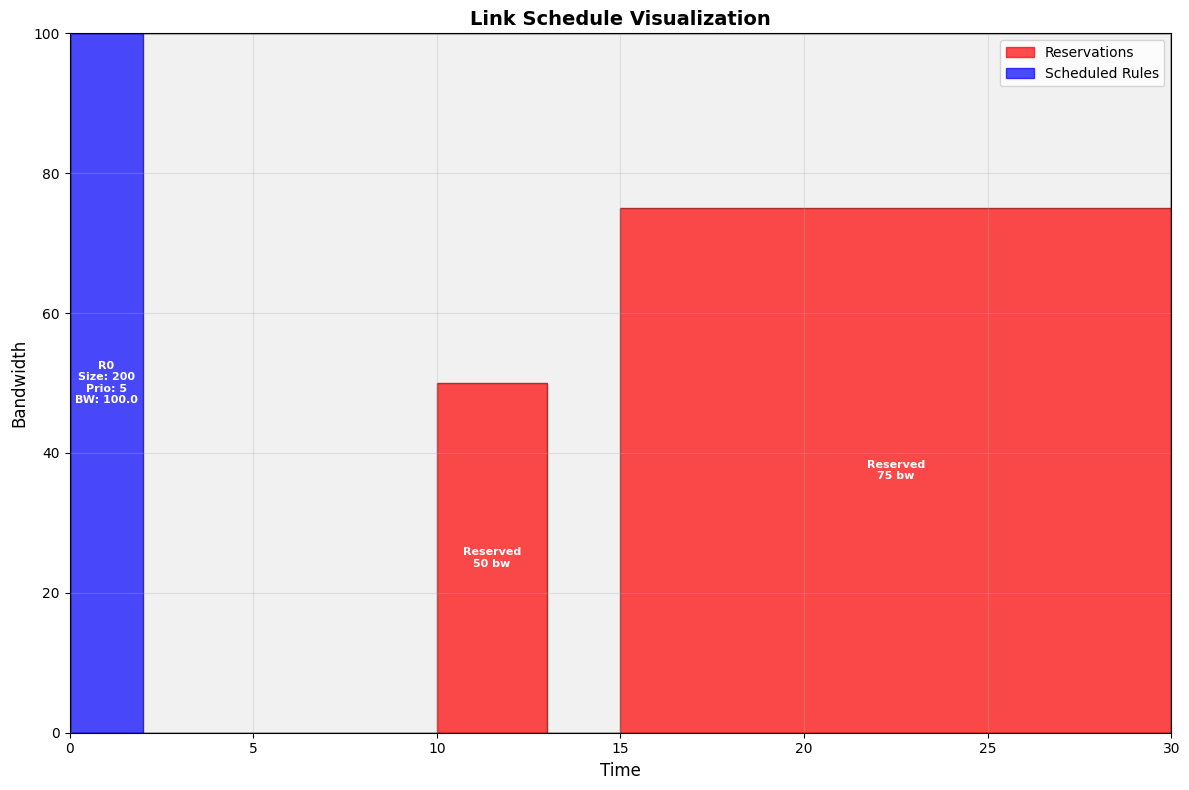

In [97]:
if USE_PRIO_FIRST:
    results = schedule_rules(rules, bandwidth, reservations)
else:
    results = schedule_rules_with_slots(rules, bandwidth, reservations)

print("Scheduled rules:")
for result in results:
    print(f"rule {result[0]}: time {result[1]:.2f}-{result[2]:.2f}, bandwidth {result[3]:.1f}")

visualize_link_schedule(rules, bandwidth, reservations, results)

In [104]:
from least_waste import run_find_least_waste, run_find_least_waste_v2
rules=[(70, 3), (300, 2), (230, 5)] #（size, priority）
main_slot=(40, 25) # bandwidth, time
reservations=[(5, 10, 10),(15, 20, 30)] # unavailable slot (x1, y1, height)

In [99]:
rules = [(100, 5), (80, 3), (60, 2)]  # 总计240
main_slot = (50, 30)  # bandwidth=50, time=30
reservations = [
    (0, 8, 30),    # 左侧占用到带宽30
    (8, 15, 20),   # 中间占用到带宽20 (这会创建一个inner slot)
    (22, 30, 25)   # 右侧占用到带宽25
]

In [106]:
rules = [(150, 4), (120, 5), (100, 3), (80, 2)]  # 总计450
main_slot = (60, 40)  # bandwidth=60, time=40
reservations = [
    (5, 10, 15),    # 创建inner1
    (10, 15, 20),   # 创建inner2
    (15, 20, 18),   # 创建inner3
    (25, 30, 30)    # 右侧占用
]

Current slot area: 300
Remaining rule sum: 450
Can fit all: False
Current slot area: 450
Remaining rule sum: 370
Can fit all: True
previous inner slot is not empty, not merging
uses priority to allocated
Conflict detected, falling back to simple area-based allocation
Rule R3: initial_h=10.00, additional_h=1.75, final_h=11.75, bandwidth=[16.00, 27.75]
Rule R2: initial_h=12.00, additional_h=2.92, final_h=14.92, bandwidth=[27.75, 42.67]
Rule R1: initial_h=15.00, additional_h=2.33, final_h=17.33, bandwidth=[42.67, 60.00]
Final allocation details:
  R4: time [0.0, 5.0], bandwidth [0.00, 16.00]
       size=80, priority=2, actual_area=80.0
  R3: time [0.0, 8.5], bandwidth [16.00, 27.75]
       size=100, priority=3, actual_area=100.0
  R2: time [0.0, 8.0], bandwidth [27.75, 42.67]
       size=120, priority=5, actual_area=120.0
  R1: time [0.0, 8.7], bandwidth [42.67, 60.00]
       size=150, priority=4, actual_area=150.0

All requests can be accommodated


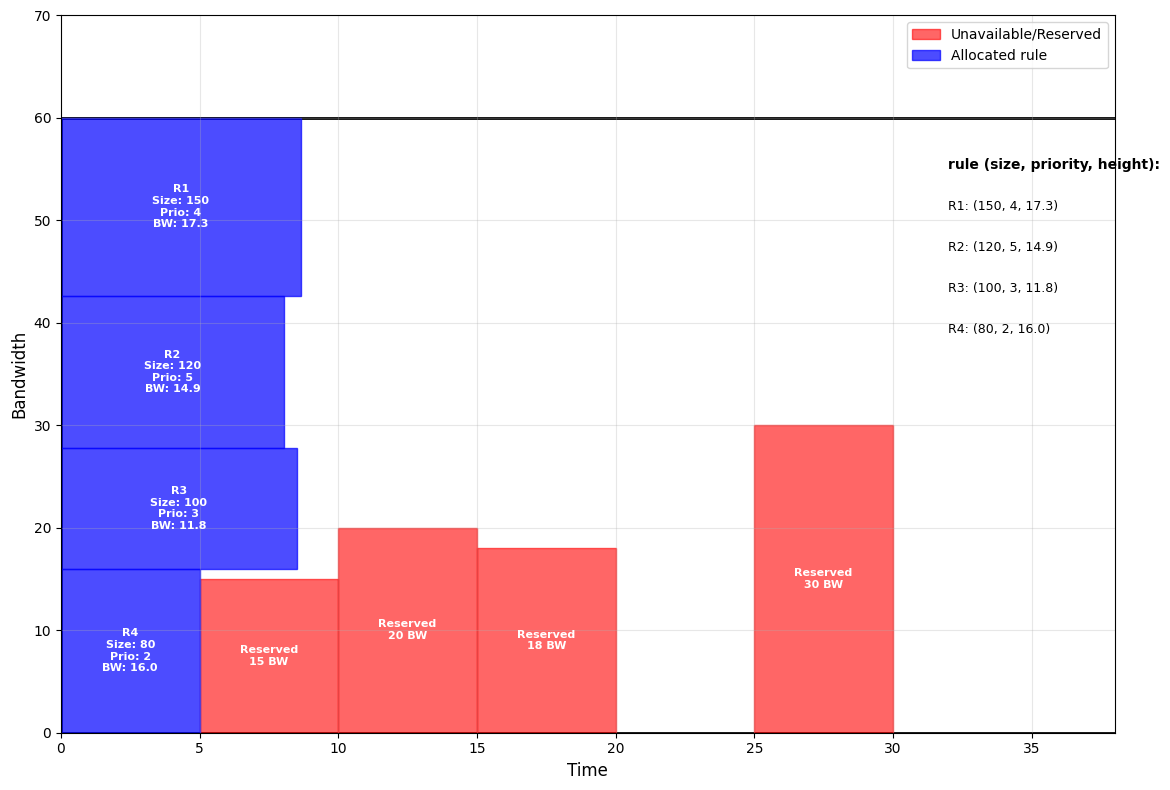

In [107]:
run_find_least_waste(reservations, main_slot, rules)

  R1: size=70, priority=3
  R2: size=300, priority=2
  R3: size=230, priority=5
Current slot area: 200
Remaining rule sum: 600
Can fit all: False
Current slot area: 450
Remaining rule sum: 600
Can fit all: False
Current slot area: 250
Remaining rule sum: 300
Can fit all: False

Allocation results:
  R2: time=[0.0, 15.0], bandwidth=[10.00, 30.00]
       size=300, priority=2, actual_area=300.0
  R3: time=[0.0, 23.0], bandwidth=[30.00, 40.00]
       size=230, priority=5, actual_area=230.0


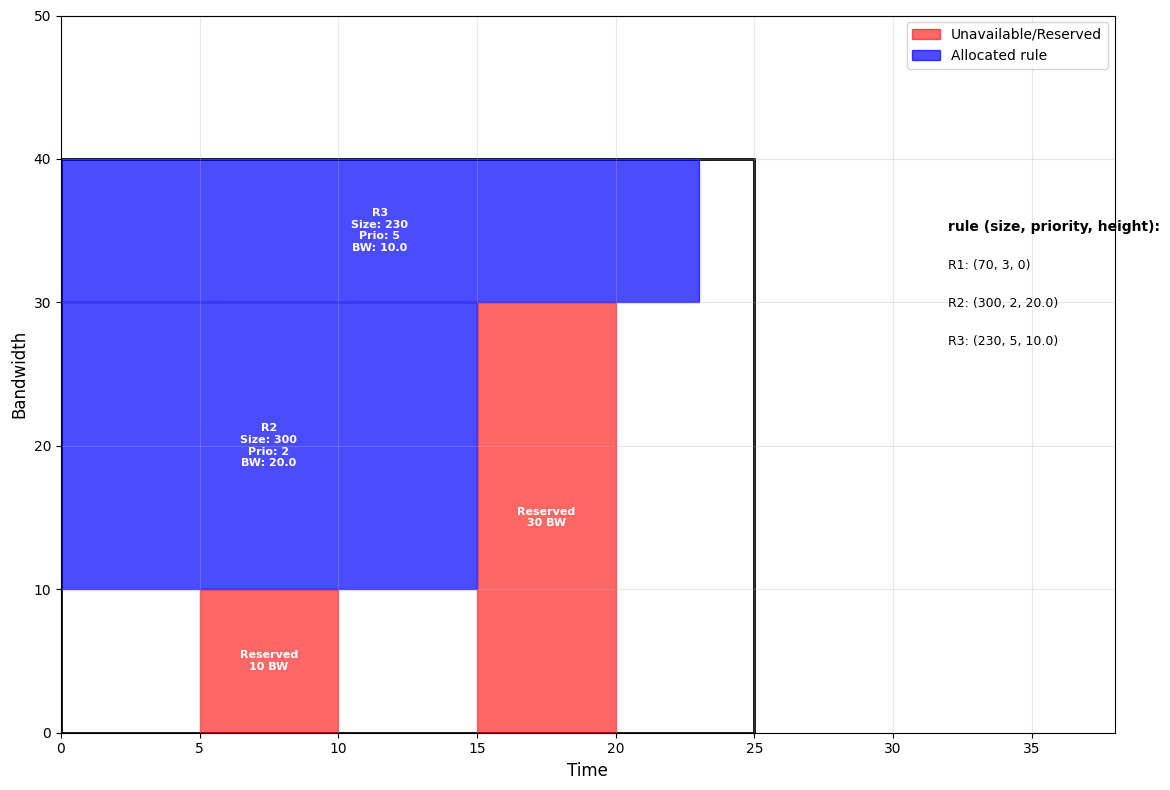

([(0, 15.0, 10, 30.0, 2), (0, 23.0, 30, 40.0, 3)], [], 1)

In [105]:
run_find_least_waste_v2(reservations, main_slot, rules)

  R1: size=100, priority=5
  R2: size=80, priority=3
  R3: size=60, priority=2
Current slot area: 200
Remaining rule sum: 240
Can fit all: False
Current slot area: 600
Remaining rule sum: 140
Can fit all: True
uses priority to allocated
Allocated rule R3: bandwidth [30.00, 38.00]
Allocated rule R2: bandwidth [38.00, 50.00]

Allocation results:
  R1: time=[0.0, 3.3], bandwidth=[0.00, 30.00]
       size=100, priority=5, actual_area=100.0
  R3: time=[0.0, 7.5], bandwidth=[30.00, 38.00]
       size=60, priority=2, actual_area=60.0
  R2: time=[0.0, 6.7], bandwidth=[38.00, 50.00]
       size=80, priority=3, actual_area=80.0

Validation:


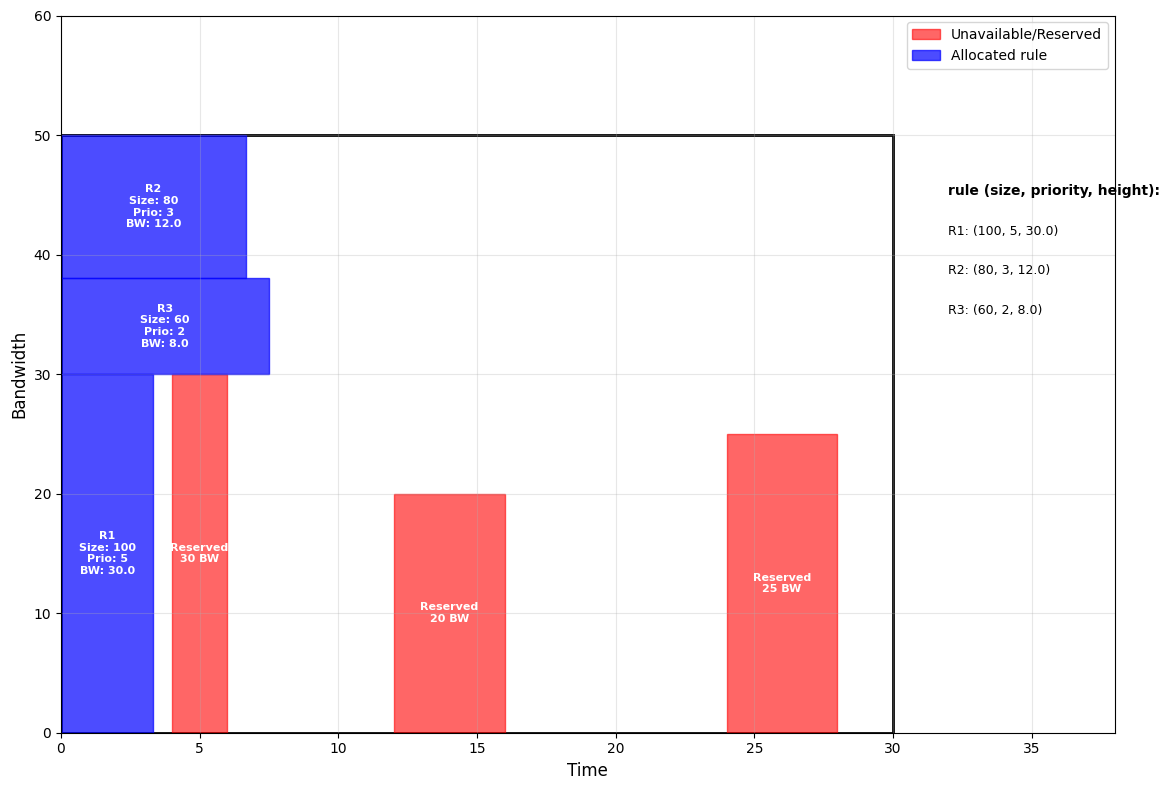

([(0, 3.3333333333333335, 0, 30.0, 1),
  (0, 7.5, 30, 38.0, 3),
  (0, 6.666666666666667, 38.0, 50.0, 2)],
 [],
 1)

In [103]:
rules = [(100, 5), (80, 3), (60, 2)]  # 总计240
main_slot = (50, 30)  # bandwidth=50, time=30
reservations = [
    (4, 6, 30),      # 早期占用
    (12, 16, 20),    # 中间占用（间隔6个单位）
    (24, 28, 25)     # 后期占用（间隔8个单位）
]
run_find_least_waste_v2(reservations, main_slot, rules)